<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/week5/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [73]:
#model = keras.Sequential([
#    layers.Dense(64, activation="relu"),
#    layers.Dense(1, activation="sigmoid")
#])

#try using one or three hidden layers, and see how doing so affects validation and test accuracy.
#16, 16, 1 >> units

In [11]:
#model = keras.Sequential([
#    layers.Dense(16, activation="tanh"),
#    layers.Dense(16, activation="tanh"),
#    layers.Dense(1, activation="sigmoid")
#])

#import tensorflow as tf
#tf.keras.activations.tanh(
#    x
#)

**Compiling the model**

In [67]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [33]:
#model.compile(optimizer="rmsprop",
#              loss="mse",
#              metrics=["accuracy"])

#import tensorflow as tf
#tf.keras.losses.MeanSquaredError(
#    reduction=losses_utils.ReductionV2.AUTO,
#    name='mean_squared_error'
#)
#model.compile(optimizer="rmsprop",
#              loss="mean_squared_error",
#              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 63ms/step - loss: 0.5122 - accuracy: 0.7887 - val_loss: 0.3949 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3211 - accuracy: 0.8947 - val_loss: 0.3197 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2337 - accuracy: 0.9221 - val_loss: 0.2791 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1828 - accuracy: 0.9389 - val_loss: 0.2790 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1482 - accuracy: 0.9513 - val_loss: 0.2825 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1198 - accuracy: 0.9623 - val_loss: 0.3062 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0980 - accuracy: 0.9697 - val_loss: 0.3284 - val_accuracy: 0.8808
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

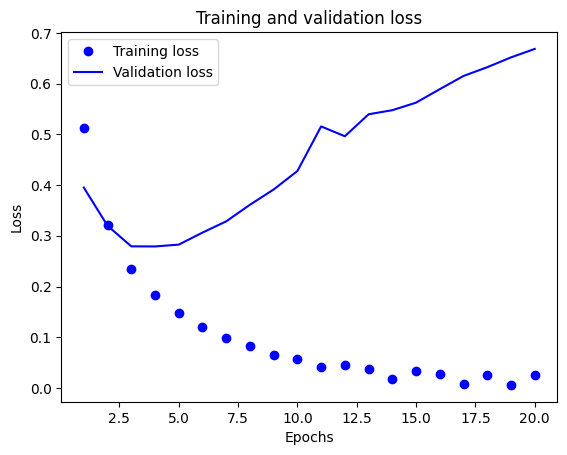

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

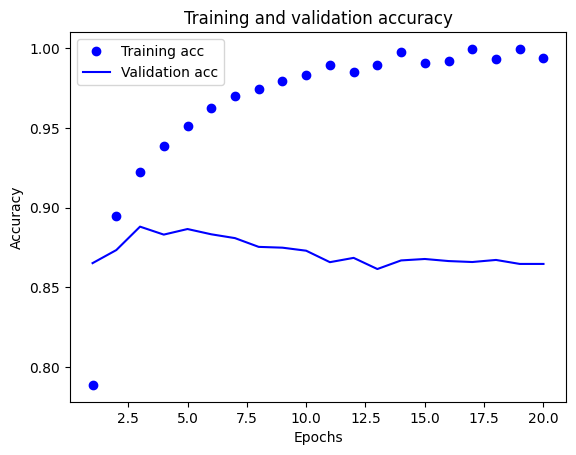

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4516 - accuracy: 0.8153
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2699 - accuracy: 0.9017
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2126 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2883 - accuracy: 0.8852


In [19]:
results

[0.2882971465587616, 0.8852400183677673]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [20]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [21]:
len(train_data)

8982

In [22]:
len(test_data)

2246

In [23]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [25]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [30]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 2.7086 - accuracy: 0.4446 - val_loss: 1.8022 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5429 - accuracy: 0.6849 - val_loss: 1.3691 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.2053 - accuracy: 0.7399 - val_loss: 1.2068 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.9959 - accuracy: 0.7789 - val_loss: 1.0910 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8302 - accuracy: 0.8198 - val_loss: 1.0627 - val_accuracy: 0.7520
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7037 - accuracy: 0.8459 - val_loss: 0.9676 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5900 - accuracy: 0.8747 - val_loss: 0.9289 - val_accuracy: 0.8140
Epoch 8/20
16

**Plotting the training and validation loss**

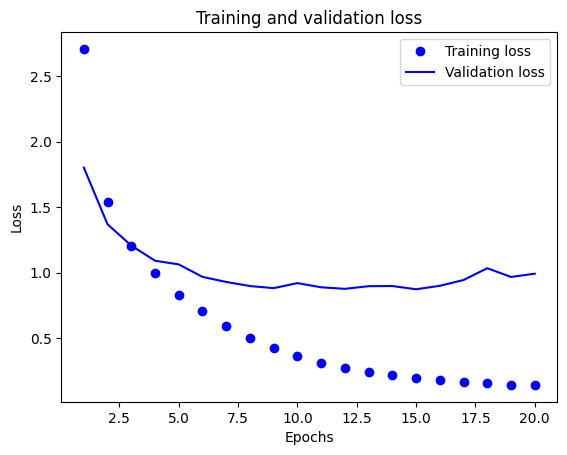

In [33]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

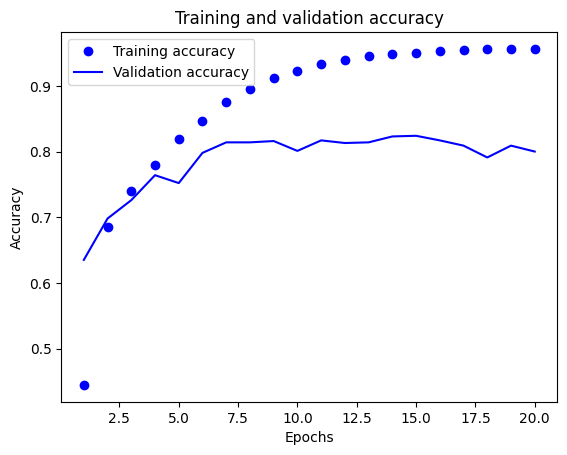

In [34]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [35]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.6505 - accuracy: 0.5207
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.4822 - accuracy: 0.6894
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1331 - accuracy: 0.7535
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9236 - accuracy: 0.8000
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7670 - accuracy: 0.8324
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6350 - accuracy: 0.8651
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5337 - accuracy: 0.8870
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4514 - accuracy: 0.9039
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9262 - accuracy: 0.7894


In [36]:
results

[0.9261600971221924, 0.7894033789634705]

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1772039180765806

### Generating predictions on new data

In [38]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

1.0

In [41]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [44]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 2.9002 - accuracy: 0.3341 - val_loss: 2.1270 - val_accuracy: 0.5550
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7562 - accuracy: 0.6120 - val_loss: 1.5241 - val_accuracy: 0.6390
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3411 - accuracy: 0.6937 - val_loss: 1.3615 - val_accuracy: 0.6750
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1661 - accuracy: 0.7185 - val_loss: 1.3073 - val_accuracy: 0.6930
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0561 - accuracy: 0.7362 - val_loss: 1.2710 - val_accuracy: 0.6870
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9704 - accuracy: 0.7556 - val_loss: 1.2655 - val_accuracy: 0.6990
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8997 - accuracy: 0.7764 - val_loss: 1.2632 - val_accuracy: 0.7000
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary